## Missing data and aggregations

In [16]:
import pandas as pd
import numpy as np

np.random.seed(1337)
size = 8

random_matrix = np.random.randint(1, 10, (size, size)) # 'size' visar visuellt hur matrixen ser ut

print(f"{random_matrix.size}")

index = np.random.choice(random_matrix.size, 10, replace=False) # 'random_matrix.size' skriver ut hur stor matrixen är
# 10 är hur många nummer man ska plocka ut från matrixen
print(f"{index = }")

# random_matrix[5, 3] = 999 # tar rad och sedan kolumn

# type converts it to float so that we can change the elements to 'None' - var int innan
random_matrix = random_matrix*1.

random_matrix.ravel()[index] = None

random_matrix


64
index = array([28, 42, 17, 49, 53, 31, 35,  2, 13, 62])


array([[ 8.,  9., nan,  8.,  3.,  3.,  5.,  9.],
       [ 7.,  7.,  8.,  9.,  2., nan,  7.,  3.],
       [ 3., nan,  2.,  8.,  4.,  2.,  4.,  4.],
       [ 5.,  9.,  9.,  8., nan,  2.,  7., nan],
       [ 5.,  3.,  6., nan,  5.,  3.,  4.,  3.],
       [ 5.,  9., nan,  4.,  9.,  9.,  8.,  5.],
       [ 4., nan,  2.,  3.,  1., nan,  9.,  3.],
       [ 2.,  1.,  2.,  5.,  3.,  1., nan,  8.]])

In [20]:
scores = pd.DataFrame(# gör en dataframe utav vår matrix från ovan
    random_matrix,
    index = [f"Player {i}" for i in range (1, size + 1)],
    columns = [f"Round {i}" for i in range(1, size + 1)]
)
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


## Missing data

In [22]:
scores.isnull() # visar bool på vad som är ett nummer eller ej, false = nummer
scores.info() # visar hur många per column som är ett nummer eller ej

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  6 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  7 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  7 non-null      float64
 7   Round 8  7 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [23]:
scores.dropna()# tar bort alla rader som har "not-a-number" på sig.

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8


In [26]:
scores.loc["Player 8"]["Round 7"] = 3 # lägger till ett värde på en utav raderna
scores.dropna() # kör vi dropna igen så försvinner alla rader för utom den som vi ändrade


,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,3.0,8.0


In [27]:
scores.dropna(axis = 'columns') # tar bort alla kolumner förutom första och sista??

,Round 1,Round 7
Player 1,8.0,5.0
Player 2,7.0,7.0
Player 3,3.0,4.0
Player 4,5.0,7.0
Player 5,5.0,4.0
Player 6,5.0,8.0
Player 7,4.0,9.0
Player 8,2.0,3.0


In [29]:
scores.fillna(0, inplace=True) # fyller alla NaN med ett nummer, "inplace=True" för att genomföra ändringen

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,-10.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,-10.0,7.0,3.0
Player 3,3.0,-10.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,-10.0,2.0,7.0,-10.0
Player 5,5.0,3.0,6.0,-10.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,-10.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,-10.0,2.0,3.0,1.0,-10.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,3.0,8.0


## Missing data - strategy

In [31]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
type(titanic["survived"]) # kollar vilket typ som en kolumn är
titanic["survived"].value_counts() #kollar mer info om data, i det här fallet hur många nollor eller ettor det finns

In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
nans = titanic.isnull().sum() # sumerar alla kolumner

<AxesSubplot: xlabel='age', ylabel='Count'>

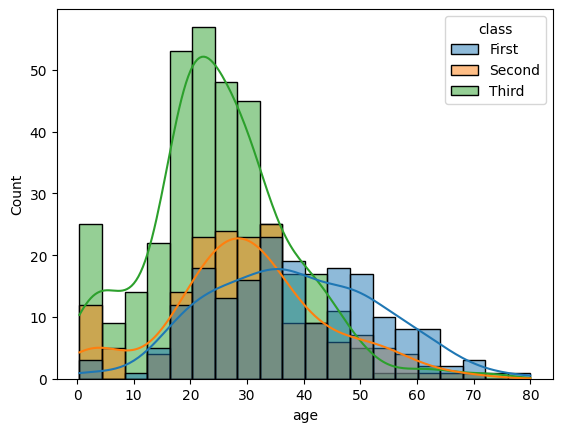

In [38]:
sns.histplot(data = titanic, x = "age", hue = "sex", kde=True) #kollar 'age'-kolumnen endast och använder ett histogram
#kan lägga till fler data så som "sex"
# "kde=True" estimerar en distribution - alltså linjerna för män och kvinnor

# case 
- a historian (domain expert) advices us to use median age of corresponding gender to fill in missing ages

In [53]:
# male: 29
median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
# female: 27
median_female_age = titanic[titanic["sex"] == "female"]["age"].median()

median_male_age, median_female_age


(29.0, 27.0)

In [ ]:
titanic[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)# ändrar alla mäns åldrar för titanic DataFramen

titanic.loc[titanic["age"] == 29, "sex"].value_counts()


In [66]:
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()

male      124
female     53
Name: sex, dtype: int64

In [ ]:
titanic["age"] == titanic["age"].fillna(median_female_age)
titanic.isnull().sum()["sex"]